In [2]:
import seaborn as sns
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [3]:
wine = pd.read_csv("winemag-data-130k-v2.csv")
wine.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [4]:
analyzer.polarity_scores(wine.loc[0]["description"])

{'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'compound': 0.1531}

In [5]:
wine.shape

(129971, 14)

In [6]:
sentiment_scores = [analyzer.polarity_scores(description) for description in wine["description"]]

In [7]:
df = pd.DataFrame(sentiment_scores)
wine["neg"] = df["neg"]
wine["neu"] = df["neu"]
wine["pos"] = df["pos"]
wine["compound"] = df["compound"]

In [8]:
wine[["description", "neg", "neu", "pos", "compound"]].head()

,description,neg,neu,pos,compound
0,"Aromas include tropical fruit, broom, brimston...",0.000,0.935,0.065,0.1531
1,"This is ripe and fruity, a wine that is smooth...",0.000,0.868,0.132,0.6486
2,"Tart and snappy, the flavors of lime flesh and...",0.053,0.947,0.000,-0.1280
3,"Pineapple rind, lemon pith and orange blossom ...",0.000,0.926,0.074,0.3400
4,"Much like the regular bottling from 2012, this...",0.000,0.805,0.195,0.8176


In [9]:
wine["length"] = [len(description.split()) for description in wine["description"]]

In [10]:
wine.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,neg,neu,pos,compound,length
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0.000,0.935,0.065,0.1531,24
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0.000,0.868,0.132,0.6486,38
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0.053,0.947,0.000,-0.1280,28


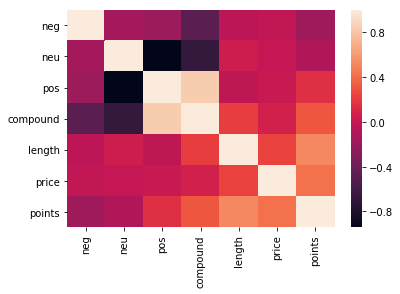

In [11]:
sns.heatmap(wine[["neg", "neu", "pos", "compound", "length", "price", "points"]].corr())

La mayor correlación se ve entre los siguientes pares de variables:
* length y points
* compound y points
* price y points
* length y price
* length y compound
* pos y points


In [12]:
normalized_wine = wine.copy(deep=True)
wine["length"] = (wine["length"] - wine["length"].min()) / (wine["length"].max() - wine["length"].min())
wine["price"] = (wine["price"] - wine["price"].min()) / (wine["price"].max() - wine["price"].min())
wine["points"] = (wine["points"] - wine["points"].min()) / (wine["points"].max() - wine["points"].min())
wine["neg"] = (wine["neg"] - wine["neg"].min()) / (wine["neg"].max() - wine["neg"].min())
wine["pos"] = (wine["pos"] - wine["pos"].min()) / (wine["pos"].max() - wine["pos"].min())

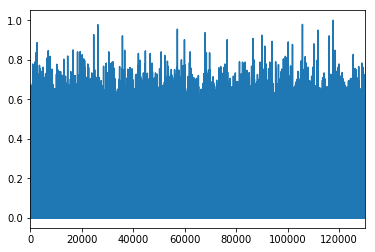

In [13]:
wine["pos"].plot.line()

/Users/fornesarturo/anaconda3/envs/ds/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/fornesarturo/anaconda3/envs/ds/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


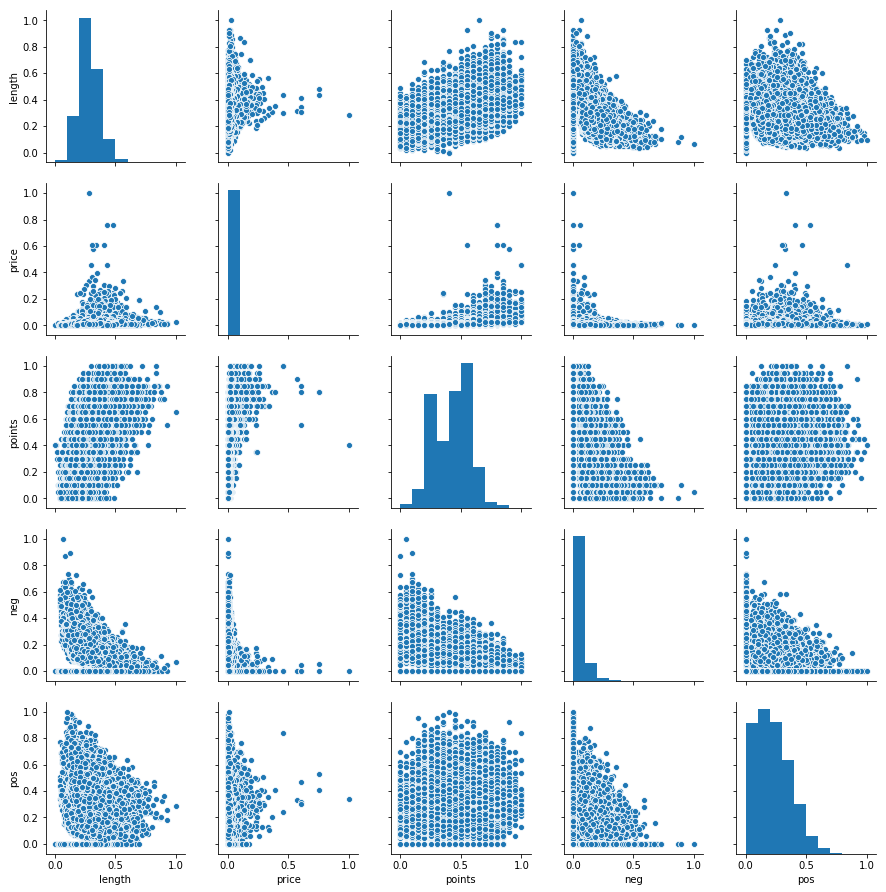

In [14]:
sns.pairplot(wine[["length", "price", "points", "neg", "pos"]])

variety
Gelber Traminer    0.75
Terrantez          0.75
Name: points, dtype: float64


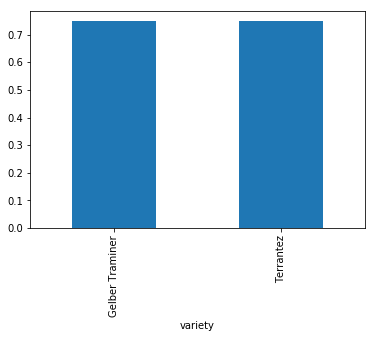

In [86]:
top_points_variety = wine.groupby("variety")["points"].mean().sort_values(ascending=False).dropna()[:2]
print(top_points_variety)
top_points_variety.plot.bar()

variety
Chancellor    0.025000
Airen         0.083333
Name: points, dtype: float64


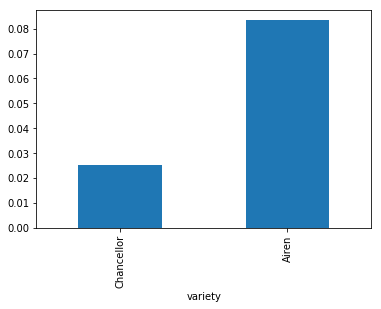

In [89]:
bottom_points_variety = wine.groupby("variety")["points"].mean().sort_values(ascending=True).dropna()[:2]
print(bottom_points_variety)
bottom_points_variety.plot.bar()

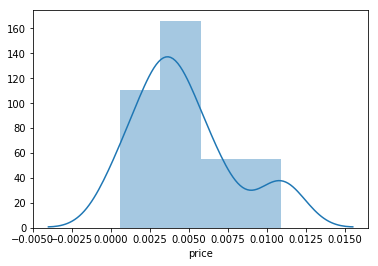

In [36]:
sns.distplot(wine[wine["variety"] == "Tempranillo-Merlot"]["price"])

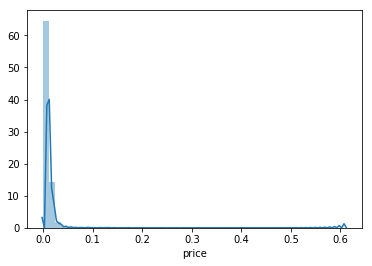

In [37]:
sns.distplot(wine[wine["variety"] == "Chardonnay"]["price"].dropna())

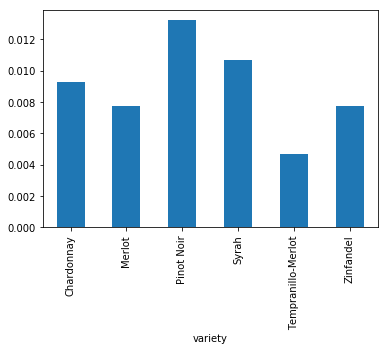

In [59]:
wine[wine["variety"].isin(["Chardonnay", "Tempranillo-Merlot", "Merlot", "Syrah", "Zinfandel", "Pinot Noir"])].groupby("variety")["price"].mean().plot.bar()
# Price

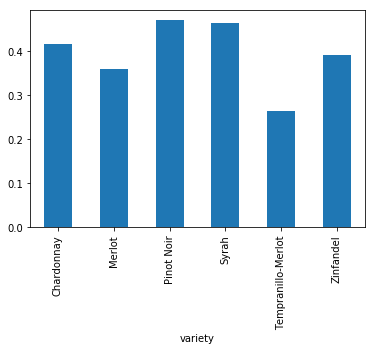

In [60]:
wine[wine["variety"].isin(["Chardonnay", "Tempranillo-Merlot", "Merlot", "Syrah", "Zinfandel", "Pinot Noir"])].groupby("variety")["points"].mean().plot.bar()
# Points

province
Südburgenland    0.700000
Madeira          0.661538
Mittelrhein      0.600000
Puente Alto      0.586667
Wachau           0.581020
Name: points, dtype: float64


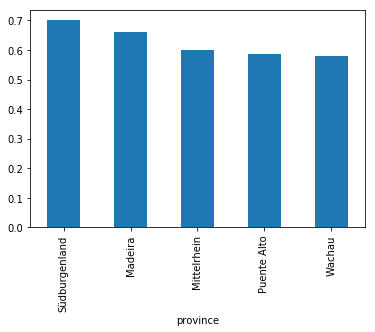

In [84]:
top_points = wine.groupby("province")["points"].mean().sort_values(ascending=False).dropna()[:5]
print(top_points)
top_points.plot.bar()

province
Colares              0.078428
Vânju Mare           0.049150
Switzerland          0.047330
Madeira              0.033732
Moscatel do Douro    0.030097
Name: price, dtype: float64


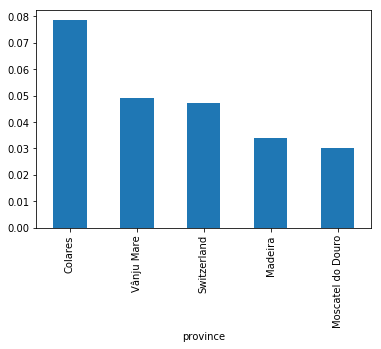

In [85]:
top_price = wine.groupby("province")["price"].mean().sort_values(ascending=False).dropna()[:5]
print(top_price)
top_price.plot.bar()